In [752]:
#DATA CLEANING
import pandas as pd

In [753]:
df = pd.read_csv('C:/Users/thara/OneDrive/Documents/flipkart_project/flipkart_products.csv')

In [754]:
df.shape


(960, 4)

In [755]:
df.head()


,Product Name,Product Price,Product Description,Product Reviews
0,"Samsung Galaxy F36 5G (Violet, 128 GB)","₹18,999",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.3
1,"Samsung Galaxy F36 5G (Violet, 128 GB)","₹17,499",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,NaN
2,"OnePlus 13R 5G (Nebula Noir, 512 GB)","₹45,995",16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Dis...,4.5
3,"OnePlus 13R 5G (Astral Trail, 512 GB)","₹45,994",16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Dis...,4.5
4,"Samsung Galaxy F36 5G (Red, 128 GB)","₹18,999",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.3


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         960 non-null    object 
 1   Product Price        955 non-null    object 
 2   Product Description  960 non-null    object 
 3   Product Reviews      820 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.1+ KB


In [757]:
df['Cleaned Price'] = (
    df['Product Price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

In [758]:
df['Product Reviews'] = df['Product Reviews'].astype(float)


In [759]:
import re

df['RAM (GB)'] = df['Product Description'].apply(
    lambda x: int(re.search(r'(\d+)\s*GB RAM', x).group(1)) if pd.notnull(x) and re.search(r'(\d+)\s*GB RAM', x) else None
)

In [760]:
df['ROM (GB)'] = df['Product Description'].apply(
    lambda x: int(re.search(r'(\d+)\s*GB ROM', x).group(1)) if pd.notnull(x) and re.search(r'(\d+)\s*GB ROM', x) else None
)

In [761]:
df['Display Size (inch)'] = df['Product Description'].apply(
    lambda x: float(re.search(r'\((\d+\.?\d*)\s*inch\)', x).group(1)) if pd.notnull(x) and re.search(r'\((\d+\.?\d*)\s*inch\)', x) else None
)


In [762]:
df['Battery (mAh)'] = df['Product Description'].apply(
    lambda x: int(re.search(r'(\d+)\s*mAh', x).group(1)) if pd.notnull(x) and re.search(r'(\d+)\s*mAh', x) else None
)


In [763]:
df.head()

,Product Name,Product Price,Product Description,Product Reviews,Cleaned Price,RAM (GB),ROM (GB),Display Size (inch),Battery (mAh)
0,"Samsung Galaxy F36 5G (Violet, 128 GB)","₹18,999",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.3,18999.0,8.0,128.0,6.70,5000.0
1,"Samsung Galaxy F36 5G (Violet, 128 GB)","₹17,499",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,NaN,17499.0,6.0,128.0,6.70,5000.0
2,"OnePlus 13R 5G (Nebula Noir, 512 GB)","₹45,995",16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Dis...,4.5,45995.0,16.0,512.0,6.78,6000.0
3,"OnePlus 13R 5G (Astral Trail, 512 GB)","₹45,994",16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Dis...,4.5,45994.0,16.0,512.0,6.78,6000.0
4,"Samsung Galaxy F36 5G (Red, 128 GB)","₹18,999",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.3,18999.0,8.0,128.0,6.70,5000.0


In [764]:
df.drop('Product Price', axis=1, inplace=True)

In [765]:
df['Brand'] = df['Product Name'].apply(lambda x: x.split(' ')[0])


In [766]:
df.rename(columns={
    'Product Name': 'Product_Name',
    'Product Description': 'Product_Description',
    'Product Reviews': 'Product_Reviews',
    'Cleaned Price': 'Product_Price',
    'RAM (GB)': 'RAM_(GB)',
    'ROM (GB)': 'ROM_(GB)',
    'Display Size (inch)': 'Display_Size_(inch)',
    'Battery (mAh)': 'Battery_(mAh)'
}, inplace=True)

In [767]:
df.head()


,Product_Name,Product_Description,Product_Reviews,Product_Price,RAM_(GB),ROM_(GB),Display_Size_(inch),Battery_(mAh),Brand
0,"Samsung Galaxy F36 5G (Violet, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.3,18999.0,8.0,128.0,6.70,5000.0,Samsung
1,"Samsung Galaxy F36 5G (Violet, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,NaN,17499.0,6.0,128.0,6.70,5000.0,Samsung
2,"OnePlus 13R 5G (Nebula Noir, 512 GB)",16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Dis...,4.5,45995.0,16.0,512.0,6.78,6000.0,OnePlus
3,"OnePlus 13R 5G (Astral Trail, 512 GB)",16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Dis...,4.5,45994.0,16.0,512.0,6.78,6000.0,OnePlus
4,"Samsung Galaxy F36 5G (Red, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.3,18999.0,8.0,128.0,6.70,5000.0,Samsung


In [768]:
df.isnull().sum()

Product_Name             0
Product_Description      0
Product_Reviews        140
Product_Price            5
RAM_(GB)               214
ROM_(GB)               136
Display_Size_(inch)     99
Battery_(mAh)          152
Brand                    0
dtype: int64

In [769]:
df['Product_Reviews'] = df['Product_Reviews'].fillna(0)

df = df[df['Product_Price'].notna()]

if not df['RAM_(GB)'].mode().empty:
    df['RAM_(GB)'] = df['RAM_(GB)'].fillna(df['RAM_(GB)'].mode()[0])

# Replace nulls in ROM_(GB) with its mode
if not df['ROM_(GB)'].mode().empty:
    df['ROM_(GB)'] = df['ROM_(GB)'].fillna(df['ROM_(GB)'].mode()[0])
#Convert to numeric
df['Display_Size_(inch)'] = pd.to_numeric(df['Display_Size_(inch)'], errors='coerce')
df['Battery_(mAh)'] = pd.to_numeric(df['Battery_(mAh)'], errors='coerce')
#Now fill missing values with median
df['Display_Size_(inch)'] = df['Display_Size_(inch)'].fillna(df['Display_Size_(inch)'].median())
df['Battery_(mAh)'] = df['Battery_(mAh)'].fillna(df['Battery_(mAh)'].median())


In [770]:
df.isnull().sum()

Product_Name           0
Product_Description    0
Product_Reviews        0
Product_Price          0
RAM_(GB)               0
ROM_(GB)               0
Display_Size_(inch)    0
Battery_(mAh)          0
Brand                  0
dtype: int64

In [771]:
df['Product_Price'] = df['Product_Price'].astype(int)

In [773]:

df.head()

,Product_Name,Product_Description,Product_Reviews,Product_Price,RAM_(GB),ROM_(GB),Display_Size_(inch),Battery_(mAh),Brand
200,"CMF by Nothing Phone 2 Pro (Orange, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,4.4,18999,8.0,128.0,6.77,5000.0,CMF
425,"OnePlus 8 (Interstellar Glow, 256 GB)",12 GB RAM | 256 GB ROM16.64 cm (6.55 inch) Dis...,4.4,32990,12.0,256.0,6.55,4300.0,OnePlus
700,"Samsung Galaxy F36 5G (Violet, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,0.0,17499,6.0,128.0,6.70,5000.0,Samsung
757,HydroWrap Screen Guard for iPhone 12 Pro Max,Nano Liquid Screen ProtectorMobileScreen Guard...,0.0,284,8.0,128.0,6.70,5000.0,HydroWrap
390,"Samsung Galaxy F36 5G (Violet, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,0.0,17499,6.0,128.0,6.70,5000.0,Samsung


In [791]:
df.dropna(subset=['Product_Price'], inplace=True)

In [792]:
df.shape

(770, 9)

In [774]:
df.to_csv("C:/Users/thara/OneDrive/Documents/flipkart_project/flipkart_dataset.csv")

In [775]:
#Exploratory Data Analysis (EDA)

In [776]:

df.shape

(770, 9)

In [777]:
df.describe()

,Product_Reviews,Product_Price,RAM_(GB),ROM_(GB),Display_Size_(inch),Battery_(mAh)
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,3.698312,27202.868831,8.480519,190.187013,6.316958,4846.774026
std,1.546180,20168.695280,2.259558,106.848343,1.241891,1173.449253
min,0.000000,198.000000,2.000000,4.000000,0.660000,800.000000
25%,4.100000,13999.000000,8.000000,128.000000,6.605000,4854.000000
50%,4.300000,22999.000000,8.000000,128.000000,6.700000,5000.000000
75%,4.400000,37999.000000,8.000000,256.000000,6.720000,5087.500000
max,4.700000,161999.000000,18.000000,512.000000,6.900000,7550.000000


In [778]:
df.shape

(770, 9)

In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 200 to 703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Name         770 non-null    object 
 1   Product_Description  770 non-null    object 
 2   Product_Reviews      770 non-null    float64
 3   Product_Price        770 non-null    int64  
 4   RAM_(GB)             770 non-null    float64
 5   ROM_(GB)             770 non-null    float64
 6   Display_Size_(inch)  770 non-null    float64
 7   Battery_(mAh)        770 non-null    float64
 8   Brand                770 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 60.2+ KB


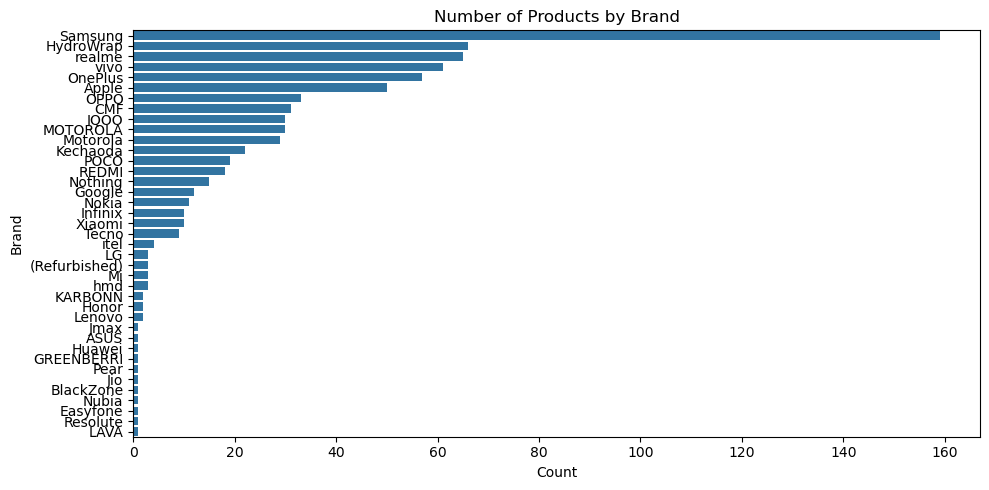

In [780]:
#Brand-wise Product Count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title("Number of Products by Brand")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

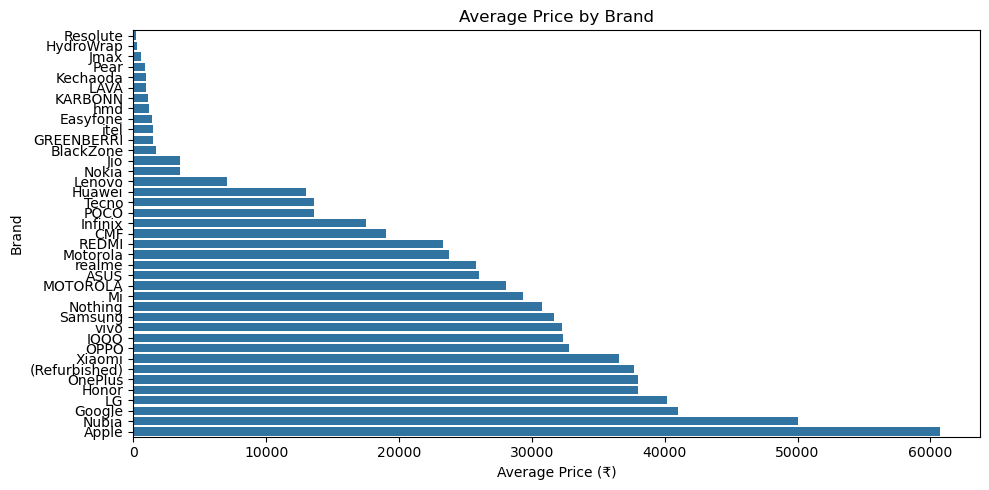

In [781]:
#Average Price by Brand
avg_price = df.groupby('Brand')['Product_Price'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title("Average Price by Brand")
plt.xlabel("Average Price (₹)")
plt.tight_layout()
plt.show()

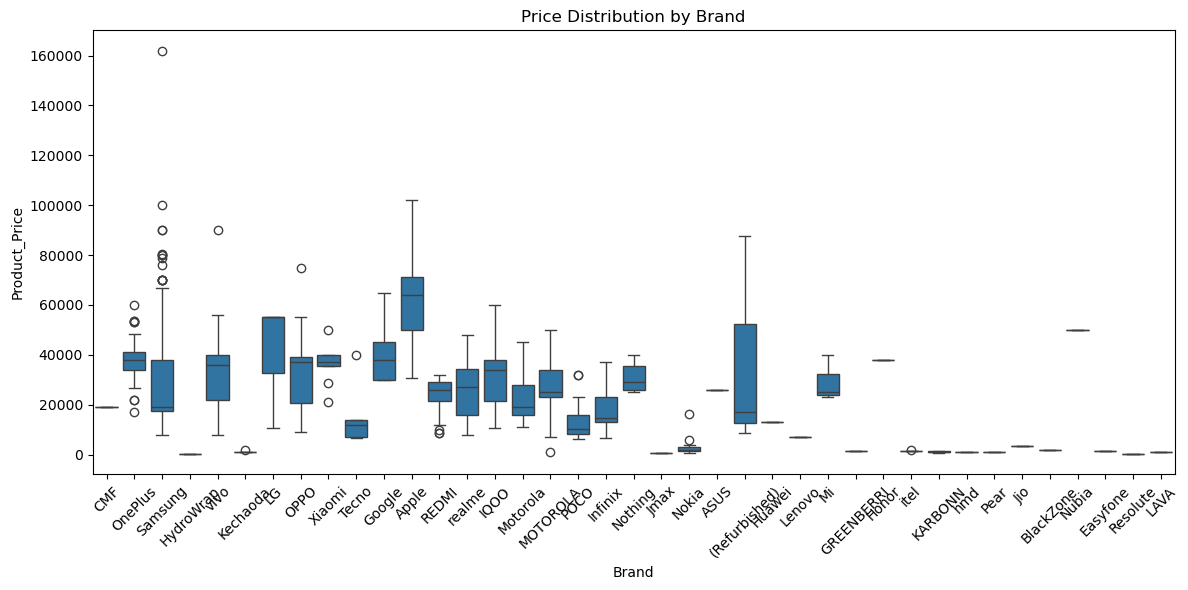

In [782]:
#Boxplot of Price by Brand (Variation + Outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Product_Price', data=df)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

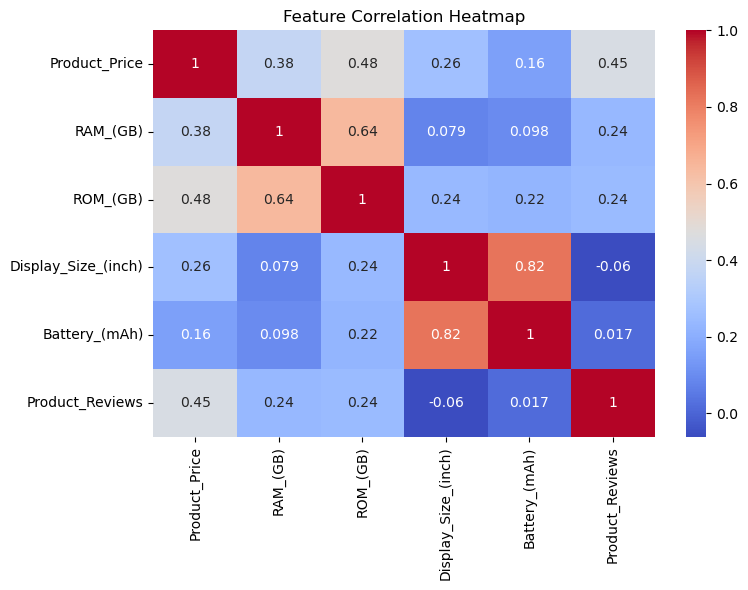

In [783]:
#Correlation Between Numerical Features
corr = df[['Product_Price', 'RAM_(GB)', 'ROM_(GB)', 'Display_Size_(inch)', 'Battery_(mAh)', 'Product_Reviews']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [784]:
# Sort and get top 10 expensive products
top10_df = df.sort_values(by='Product_Price', ascending=False).head(10)

# View them
top10_df[['Brand', 'Product_Name', 'Product_Price']]

,Brand,Product_Name,Product_Price
524,Samsung,"Samsung Galaxy S23 Ultra 5G (Green, 512 GB)",161999
515,Apple,"Apple iPhone 15 Plus (Blue, 512 GB)",101999
418,Samsung,"Samsung Galaxy Z Flip5 (Mint, 256 GB)",99999
453,Samsung,"Samsung Galaxy S24 5G (Onyx Black, 512 GB)",89999
472,Samsung,Samsung Galaxy Z Flip5 Special Edition (Yellow...,89999
404,vivo,"vivo X100 Pro (Asteroid Black, 512 GB)",89999
357,(Refurbished),(Refurbished) Samsung Galaxy Z Fold4 5G (Phant...,87499
553,Apple,"Apple iPhone 8 (PRODUCT)RED (Red, 256 GB)",81500
575,Apple,"Apple iPhone 6 Plus (Gold, 128 GB)",80500
722,Samsung,"Samsung Galaxy S24 Ultra 5G (Titanium Black, 2...",80485


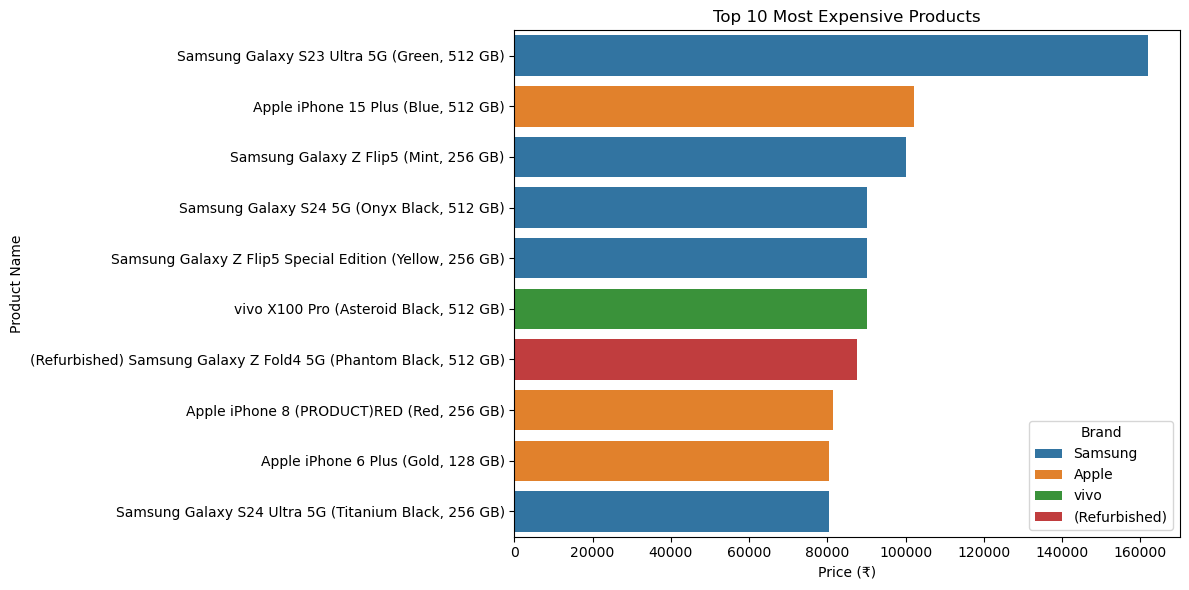

In [785]:
#Bar Plot – Top 10 Product Prices
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Price', y='Product_Name', data=top10_df, hue='Brand')
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Price (₹)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [786]:
#Compare Key Features in Top 10
top10_df[['Product_Name', 'Brand', 'Product_Price', 'RAM_(GB)', 'ROM_(GB)', 'Display_Size_(inch)', 'Battery_(mAh)', 'Product_Reviews']]


,Product_Name,Brand,Product_Price,RAM_(GB),ROM_(GB),Display_Size_(inch),Battery_(mAh),Product_Reviews
524,"Samsung Galaxy S23 Ultra 5G (Green, 512 GB)",Samsung,161999,12.0,512.0,6.80,5000.0,4.6
515,"Apple iPhone 15 Plus (Blue, 512 GB)",Apple,101999,8.0,512.0,6.70,5000.0,4.6
418,"Samsung Galaxy Z Flip5 (Mint, 256 GB)",Samsung,99999,8.0,256.0,6.70,3700.0,4.4
453,"Samsung Galaxy S24 5G (Onyx Black, 512 GB)",Samsung,89999,8.0,512.0,6.20,4000.0,4.6
472,Samsung Galaxy Z Flip5 Special Edition (Yellow...,Samsung,89999,8.0,256.0,6.70,3700.0,4.3
404,"vivo X100 Pro (Asteroid Black, 512 GB)",vivo,89999,16.0,512.0,6.78,5400.0,4.7
357,(Refurbished) Samsung Galaxy Z Fold4 5G (Phant...,(Refurbished),87499,12.0,512.0,6.70,4400.0,0.0
553,"Apple iPhone 8 (PRODUCT)RED (Red, 256 GB)",Apple,81500,8.0,256.0,4.70,5000.0,4.7
575,"Apple iPhone 6 Plus (Gold, 128 GB)",Apple,80500,8.0,128.0,5.50,5000.0,4.7
722,"Samsung Galaxy S24 Ultra 5G (Titanium Black, 2...",Samsung,80485,12.0,256.0,6.80,5000.0,4.6


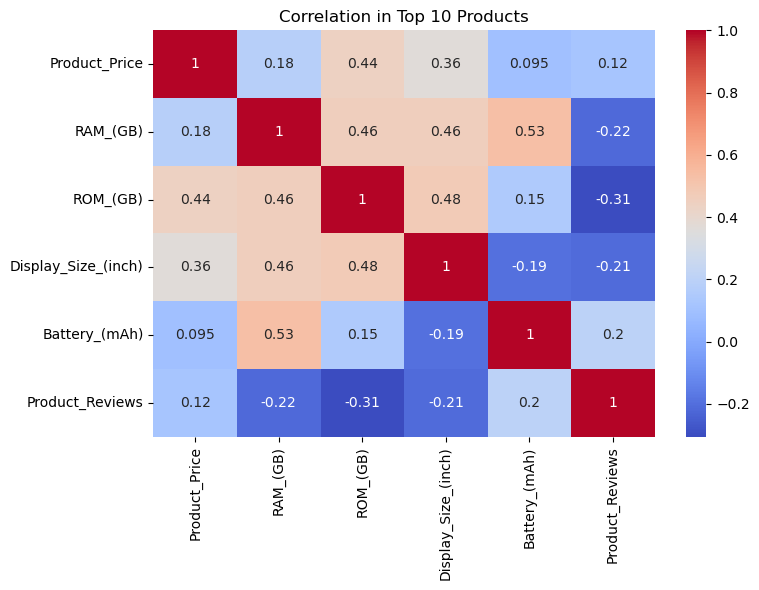

In [787]:
#Correlation Heatmap (Top 10)
plt.figure(figsize=(8, 6))
sns.heatmap(top10_df[['Product_Price', 'RAM_(GB)', 'ROM_(GB)', 'Display_Size_(inch)', 'Battery_(mAh)', 'Product_Reviews']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation in Top 10 Products")
plt.tight_layout()
plt.show()

In [788]:
#Statistical Analysis
df[['Product_Price', 'RAM_(GB)', 'ROM_(GB)', 'Display_Size_(inch)', 'Battery_(mAh)', 'Product_Reviews']].describe()


,Product_Price,RAM_(GB),ROM_(GB),Display_Size_(inch),Battery_(mAh),Product_Reviews
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,27202.868831,8.480519,190.187013,6.316958,4846.774026,3.698312
std,20168.695280,2.259558,106.848343,1.241891,1173.449253,1.546180
min,198.000000,2.000000,4.000000,0.660000,800.000000,0.000000
25%,13999.000000,8.000000,128.000000,6.605000,4854.000000,4.100000
50%,22999.000000,8.000000,128.000000,6.700000,5000.000000,4.300000
75%,37999.000000,8.000000,256.000000,6.720000,5087.500000,4.400000
max,161999.000000,18.000000,512.000000,6.900000,7550.000000,4.700000


In [789]:
#Skewness & Kurtosis
from scipy.stats import skew, kurtosis

for col in ['Product_Price', 'RAM_(GB)', 'ROM_(GB)', 'Display_Size_(inch)', 'Battery_(mAh)', 'Product_Reviews']:
    print(f"{col}: Skew = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")


Product_Price: Skew = 1.08, Kurtosis = 2.77
RAM_(GB): Skew = 0.70, Kurtosis = 1.30
ROM_(GB): Skew = 1.61, Kurtosis = 2.67
Display_Size_(inch): Skew = -3.51, Kurtosis = 11.13
Battery_(mAh): Skew = -1.83, Kurtosis = 4.79
Product_Reviews: Skew = -1.94, Kurtosis = 1.85


In [790]:
#ANOVA: Does Brand Affect Price
from scipy.stats import f_oneway

groups = df.groupby('Brand')['Product_Price'].apply(list)
valid_groups = [group for group in groups if len(group) > 1]

f_stat, p_val = f_oneway(*valid_groups)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Brand has a significant effect on price.")
else:
    print("No significant difference in price among brands.")


F-statistic: 28.99, P-value: 0.0000
Brand has a significant effect on price.
